# Import relevant Libraries

In [0]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras.backend as K
import os
from tqdm import tqdm
%matplotlib inline

# Loading Images and their labels

In [2]:
train = pd.read_csv('Multi_Label_dataset/train.csv')

train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

y = np.array(train.drop(['Id', 'Genre'],axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1)

100%|██████████| 7254/7254 [00:20<00:00, 359.70it/s]


# Making and compiling the CNN model

In [3]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 53, 53, 32)        0         
_________________________________________

# Training for 10 epochs

In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)
model.evaluate(X_test, y_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5875 samples, validate on 653 samples
Epoch 1/10
5875/5875 [==============================] - 12s 2ms/sample - loss: 0.3469 - acc: 0.8636 - val_loss: 0.2474 - val_acc: 0.9070
Epoch 2/10
5875/5875 [==============================] - 6s 948us/sample - loss: 0.2671 - acc: 0.9046 - val_loss: 0.2409 - val_acc: 0.9060
Epoch 3/10
5875/5875 [==============================] - 6s 946us/sample - loss: 0.2574 - acc: 0.9069 - val_loss: 0.2394 - val_acc: 0.9060
Epoch 4/10
5875/5875 [==============================] - 6s 954us/sample - loss: 0.2519 - acc: 0.9074 - val_loss: 0.2420 - val_acc: 0.9055
Epoch 5/10
5875/5875 [==============================] - 6s 948us/sample - loss: 0.2493 - acc: 0.9080 - val_loss: 0.2361 - val_acc: 0.9075
Epoch 6/10
5875/5875 [==============================] - 6s 939us/sample - loss: 0.2472 - acc: 0.9086 - val_loss: 0.2366 - val_acc: 0.9085
Epoch 7/10
5875/5875 [==========

[0.23862200790692953, 0.91013765]

# Assesing Model performance
## As seen by the f1 score and the correspoding lrap and hamming loss it is evident that the high accuracy is the result of of extreme overfitting



label_ranking_average_precision_score
0.3232669729453806

hamming_loss
0.0919448698315467

Classwise f1_score


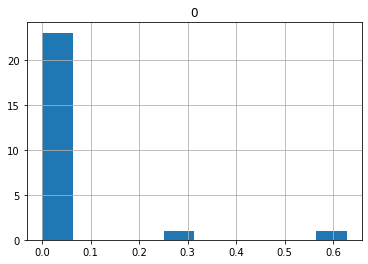

In [5]:
from sklearn.metrics import f1_score, label_ranking_average_precision_score, hamming_loss
import warnings
warnings.filterwarnings("ignore")

pred = model.predict(X_val)

print("\nlabel_ranking_average_precision_score")
print(label_ranking_average_precision_score(np.round(pred), y_val))

print("\nhamming_loss")
print(hamming_loss(np.round(pred), y_val))

print("\nClasswise f1_score")
f1 = []
for i in list(pd.DataFrame(np.round(y_val))):
  f1.append([f1_score(pd.DataFrame(np.round(pred))[i], pd.DataFrame(np.round(y_val))[i])])

pd.DataFrame(f1).hist()
plt.show()